In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import plotly.graph_objs as go

data=pd.read_excel('Data\\UCS-Satellite-Database-1-1-2023.xlsx')
# Establecer la opción para mostrar todas las columnas
pd.set_option('display.max_columns', None)
data.head(4)
data.info()
data.describe()
#crear data para ver si tengo nulos
nulos_por_columna =data.isnull().sum()
# Filtrar y mostrar solo las columnas con valores nulos
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]
print(columnas_con_nulos)
# Obtener las columnas que comienzan con 'Unnamed'
columnas_unnamed = [col for col in data.columns if 'Unnamed' in col]

# Eliminar las columnas 'Unnamed' del DataFrame
data_sin_unnamed = data.drop(columns=columnas_unnamed)


# Verificar el nuevo conjunto de datos sin las columnas 'Unnamed'
data_sin_unnamed.info()
data2=data_sin_unnamed
data2.head(1)
eliminar_columnas=['Comments','Source Used for Orbital Data','Name of Satellite, Alternate Names','Source','Source.1','Source.2','Source.3','Source.4','Source.5','Source.6']
data3=data2.drop(columns=eliminar_columnas)
data3.head(2)
data3.columns
# crear nuevo dataframe con informacion relevante
columnas_seleccionadas = ['Current Official Name of Satellite', 'Country/Org of UN Registry',
       'Country of Operator/Owner', 'Operator/Owner', 'Users', 'Purpose',
       'Detailed Purpose','Launch Mass (kg.)', 'Dry Mass (kg.)', 'Power (watts)',
       'Date of Launch', 'Expected Lifetime (yrs.)', 'Contractor',
       'Country of Contractor', 'Launch Site', 'Launch Vehicle',]
nuevo_df = data3[columnas_seleccionadas].copy()
nuevo_df.head(2)
nuevo_df.to_csv('satelites.csv', index=False)
# Reemplaza todos los valores '11/29/018' con '2018-11-29' en la columna 'Date of Launch'
nuevo_df.loc[nuevo_df['Date of Launch'] == '11/29/018', 'Date of Launch'] = '2018-11-29'

# Convierte la columna 'Date of Launch' a tipo datetime
nuevo_df['Date of Launch'] = pd.to_datetime(nuevo_df['Date of Launch'], errors='coerce')

# Convertir la columna 'Date of Launch' a tipo datetime
#nuevo_df['Date of Launch'] = pd.to_datetime(nuevo_df['Date of Launch'])

# Extraer el año de la columna 'Date of Launch'
nuevo_df['Launch Year'] = nuevo_df['Date of Launch'].dt.year


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6718 entries, 0 to 6717
Data columns (total 68 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Name of Satellite, Alternate Names  6718 non-null   object 
 1   Current Official Name of Satellite  6718 non-null   object 
 2   Country/Org of UN Registry          6718 non-null   object 
 3   Country of Operator/Owner           6718 non-null   object 
 4   Operator/Owner                      6718 non-null   object 
 5   Users                               6718 non-null   object 
 6   Purpose                             6718 non-null   object 
 7   Detailed Purpose                    1167 non-null   object 
 8   Class of Orbit                      6718 non-null   object 
 9   Type of Orbit                       6077 non-null   object 
 10  Longitude of GEO (degrees)          6716 non-null   float64
 11  Perigee (km)                        6718 no

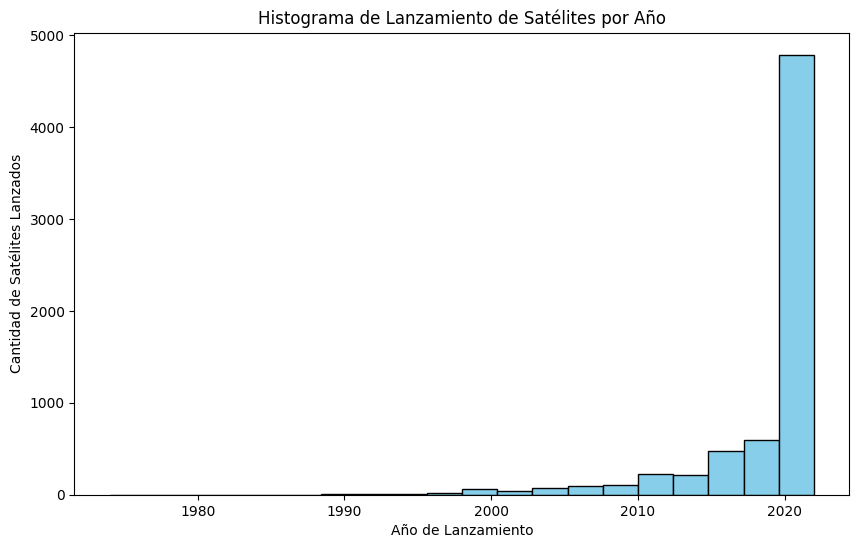

In [2]:

# Crear un histograma de los lanzamientos por año
plt.figure(figsize=(10, 6))
nuevo_df['Launch Year'].hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad de Satélites Lanzados')
plt.title('Histograma de Lanzamiento de Satélites por Año')
plt.grid(False)
plt.show()


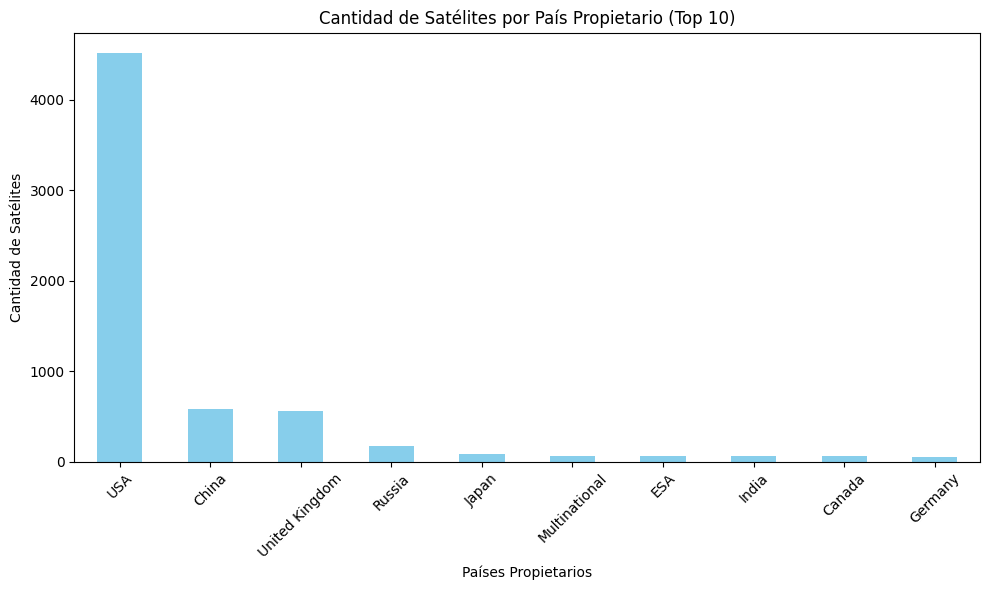

In [3]:

# Contar la cantidad de satélites por país propietario
satelites_por_pais = nuevo_df['Country of Operator/Owner'].value_counts()

# Limitar el número de países mostrados en el gráfico (opcional)
top_paises = 10  # Puedes cambiar esto para mostrar más o menos países
satelites_top_paises = satelites_por_pais.head(top_paises)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
satelites_top_paises.plot(kind='bar', color='skyblue')
plt.xlabel('Países Propietarios')
plt.ylabel('Cantidad de Satélites')
plt.title('Cantidad de Satélites por País Propietario (Top 10)')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()


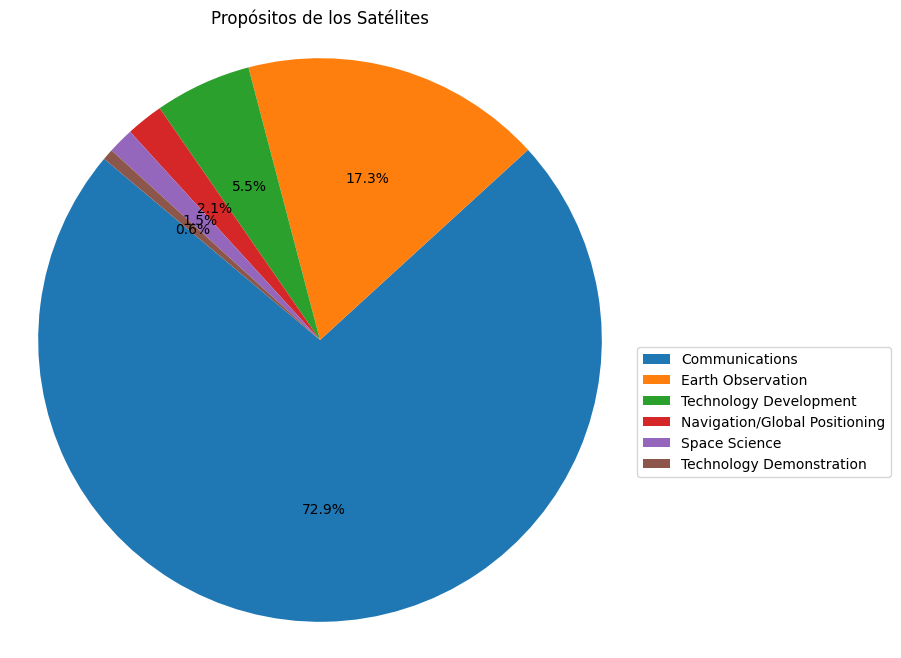

In [4]:

# Contar los valores únicos en la columna 'Purpose'
conteo_propositos = nuevo_df['Purpose'].value_counts()

# Filtrar para mostrar solo aquellos propósitos que superan el 1%
conteo_propositos = conteo_propositos[conteo_propositos / len(nuevo_df) * 100 > 0.5]

# Configurar los datos para el gráfico de pastel
labels = conteo_propositos.index
sizes = conteo_propositos.values

# Crear el gráfico de pastel 
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=None, autopct='%1.1f%%', startangle=140)
plt.title('Propósitos de los Satélites')

# Mostrar porcentajes fuera del gráfico con una buena ubicación
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.show()

Country of Operator/Owner
USA                           4511
China                          586
United Kingdom                 561
Russia                         177
Japan                           88
                              ... 
United Kingdom/Netherlands       1
Laos                             1
China                            1
USA/Canada                       1
China/Italy                      1
Name: count, Length: 104, dtype: int64
Country of Operator/Owner
USA                           4511
China                          586
United Kingdom                 561
Russia                         177
Japan                           88
                              ... 
United Kingdom/Netherlands       1
Laos                             1
China                            1
USA/Canada                       1
China/Italy                      1
Name: count, Length: 104, dtype: int64


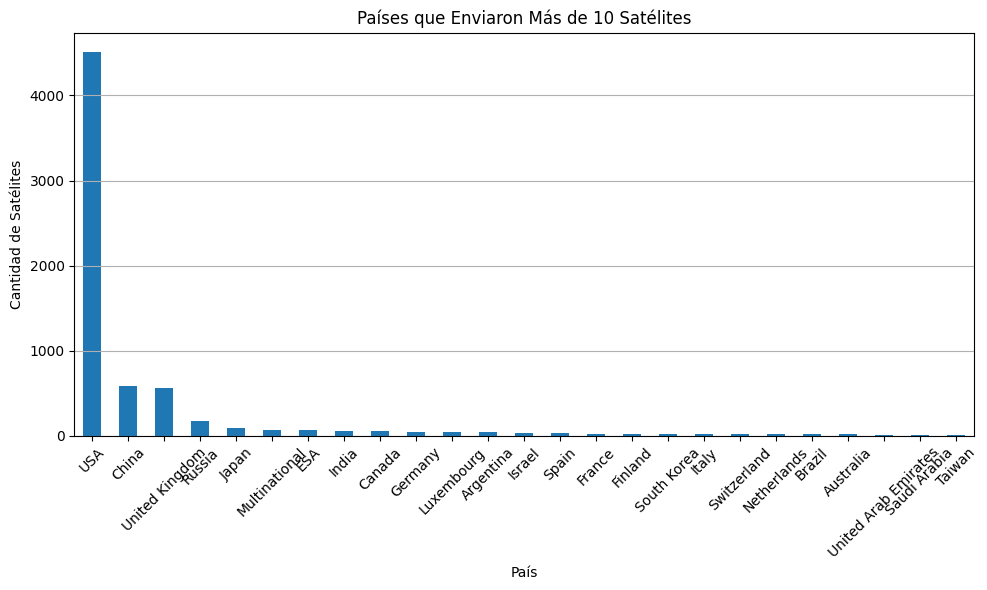

In [5]:

# Contar los satélites lanzados por cada país
conteo_paises = nuevo_df['Country of Operator/Owner'].value_counts()

print(conteo_paises)
# Contar los satélites lanzados por cada país
conteo_paises = nuevo_df['Country of Operator/Owner'].value_counts()

print(conteo_paises)
# Contar los satélites lanzados por cada país
conteo_paises = nuevo_df['Country of Operator/Owner'].value_counts()

# Filtrar para mostrar solo los países que enviaron más de 10 satélites
conteo_paises_filtrado = conteo_paises[conteo_paises > 10]

# Crear el gráfico de barras para los países que enviaron más de 10 satélites
plt.figure(figsize=(10, 6))
conteo_paises_filtrado.plot(kind='bar')
plt.title('Países que Enviaron Más de 10 Satélites')
plt.xlabel('País')
plt.ylabel('Cantidad de Satélites')
plt.xticks(rotation=45)  # Rotar etiquetas del eje x para mejor legibilidad
plt.grid(axis='y')  # Mostrar líneas de la cuadrícula en el eje y
plt.tight_layout()
plt.show()

Argentina envió 38 satélites.
España envió 26 satélites.
                              Launch Site Country of Operator/Owner
0                                 Antares      United Arab Emirates
1                     Baikonur Cosmodrome            United Kingdom
2                          Cape Canaveral                       USA
3                                  Cygnus                       USA
4                    Dombarovsky Air Base                       USA
5                     FANTM-RAiL (Xtenti)                       USA
6                     FANTM-RAiL [Xtenti]                       USA
7                     Guiana Space Center                       USA
8             International Space Station                       USA
9   International Space Station - Antares                     Japan
10   International Space Station - Cygnus                       USA
11        Jiuquan Satellite Launch Center                     China
12                          Kodiak Island                  

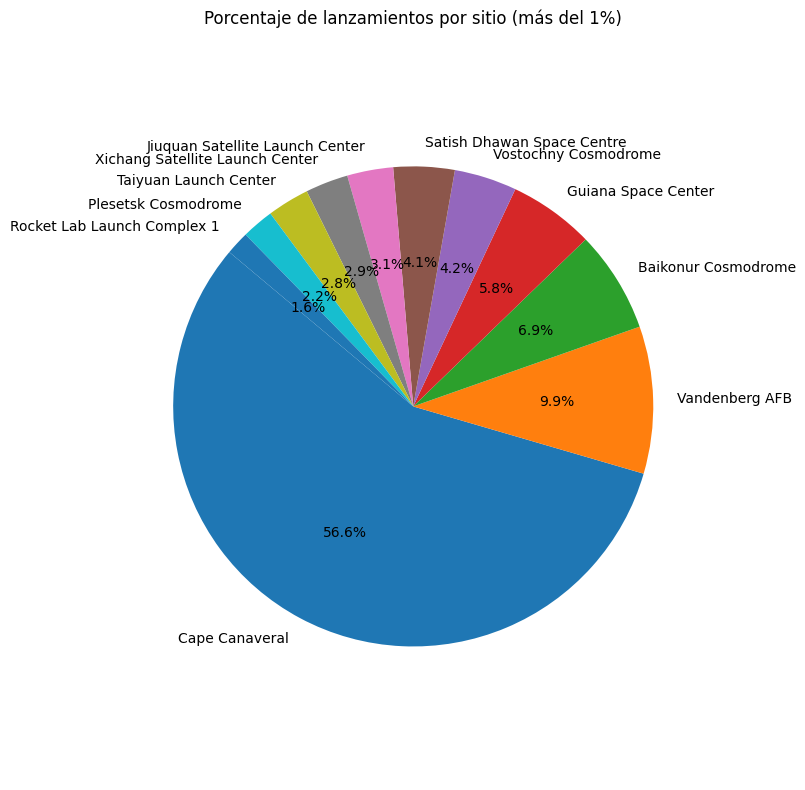

In [6]:

# Contar los satélites enviados por cada país
conteo_paises = nuevo_df['Country of Operator/Owner'].value_counts()

# Obtener el número de satélites enviados por Argentina y España
satelites_argentina = conteo_paises.get('Argentina', 0)
satelites_espana = conteo_paises.get('Spain', 0)

print(f"Argentina envió {satelites_argentina} satélites.")
print(f"España envió {satelites_espana} satélites.")

# Contar los lanzamientos desde cada sitio específico y los países responsables
lanzamientos_por_sitio = nuevo_df.groupby('Launch Site')['Country of Operator/Owner'].value_counts().reset_index(name='Lanzamientos')

# Encontrar el país con más lanzamientos desde cada sitio
paises_max_lanzamientos_por_sitio = lanzamientos_por_sitio.groupby('Launch Site').agg({'Country of Operator/Owner': lambda x: x.iloc[0]}).reset_index()

print(paises_max_lanzamientos_por_sitio)

# Calcular la esperanza de vida promedio por país
esperanza_vida_por_pais = nuevo_df.groupby('Country of Operator/Owner')['Expected Lifetime (yrs.)'].mean().reset_index()
esperanza_vida_por_pais = esperanza_vida_por_pais.dropna()  # Eliminar NaN si hay valores faltantes

# Ordenar los países por su esperanza de vida promedio de los satélites
esperanza_vida_por_pais = esperanza_vida_por_pais.sort_values(by='Expected Lifetime (yrs.)', ascending=False)

print(esperanza_vida_por_pais)

# Contar los lanzamientos desde cada sitio específico
conteo_lanzamientos = nuevo_df['Launch Site'].value_counts()

# Filtrar aquellos con más del 1% de participación
umbral = 0.01
conteo_filtado = conteo_lanzamientos[conteo_lanzamientos / conteo_lanzamientos.sum() > umbral]

# Configurar el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(conteo_filtado, labels=conteo_filtado.index, autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de lanzamientos por sitio (más del 1%)')
plt.axis('equal')  # Aspecto de círculo
plt.tight_layout()
plt.show()

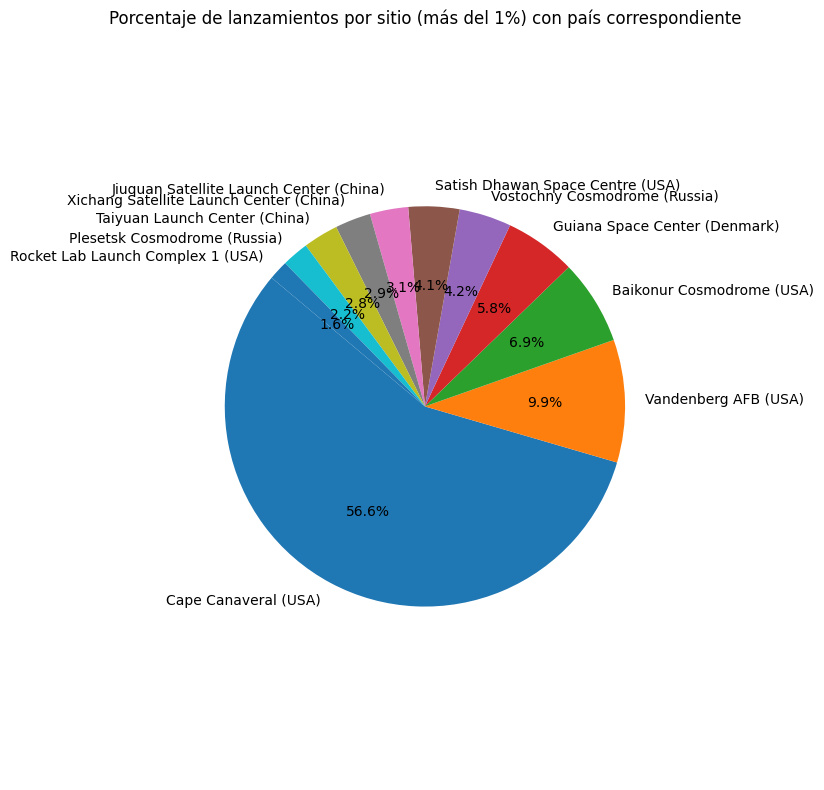

In [7]:

# Crear un diccionario que mapea los sitios de lanzamiento con sus respectivos países
sitios_paises = nuevo_df.groupby('Launch Site')['Country of Contractor'].unique().apply(lambda x: x[0])

# Contar los lanzamientos desde cada sitio específico
conteo_lanzamientos = nuevo_df['Launch Site'].value_counts()

# Filtrar aquellos con más del 1% de participación
umbral = 0.01
conteo_filtado = conteo_lanzamientos[conteo_lanzamientos / conteo_lanzamientos.sum() > umbral]

# Obtener los países correspondientes a los sitios de lanzamiento filtrados
paises_filtados = sitios_paises[conteo_filtado.index]

# Configurar el gráfico de pastel con información adicional de países
plt.figure(figsize=(8, 8))
plt.pie(conteo_filtado, labels=[f"{site} ({country})" for site, country in zip(conteo_filtado.index, paises_filtados)],
        autopct='%1.1f%%', startangle=140)
plt.title('Porcentaje de lanzamientos por sitio (más del 1%) con país correspondiente')
plt.axis('equal')  # Aspecto de círculo
plt.tight_layout()
plt.show()

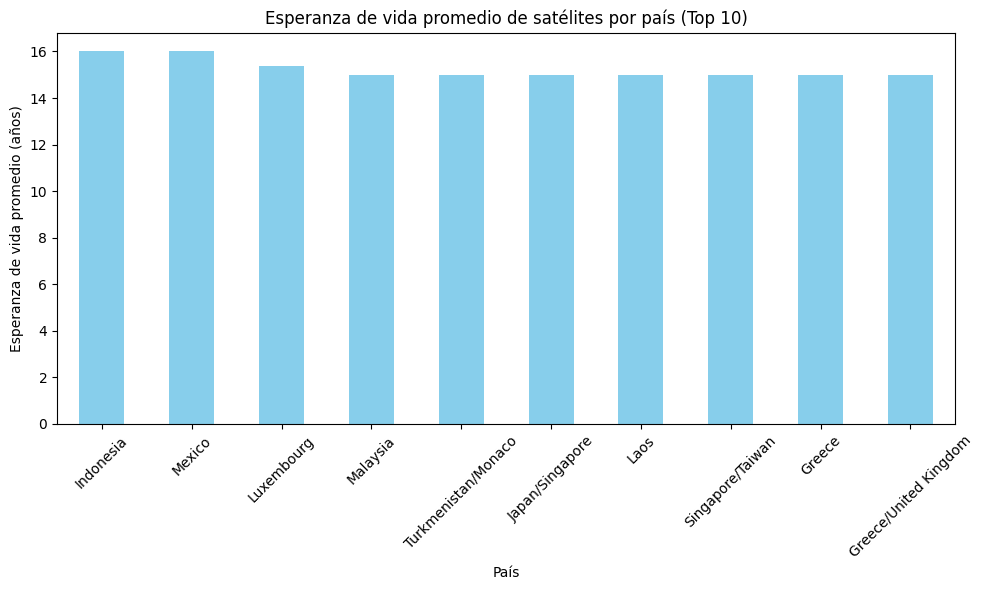

In [8]:

# Calcular la esperanza de vida promedio por país
esperanza_vida_por_pais = nuevo_df.groupby('Country of Operator/Owner')['Expected Lifetime (yrs.)'].mean().dropna()

# Ordenar los países por la esperanza de vida promedio de los satélites
esperanza_vida_por_pais = esperanza_vida_por_pais.sort_values(ascending=False)

# Graficar la esperanza de vida promedio por país
plt.figure(figsize=(10, 6))
esperanza_vida_por_pais.head(10).plot(kind='bar', color='skyblue')
plt.title('Esperanza de vida promedio de satélites por país (Top 10)')
plt.xlabel('País')
plt.ylabel('Esperanza de vida promedio (años)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

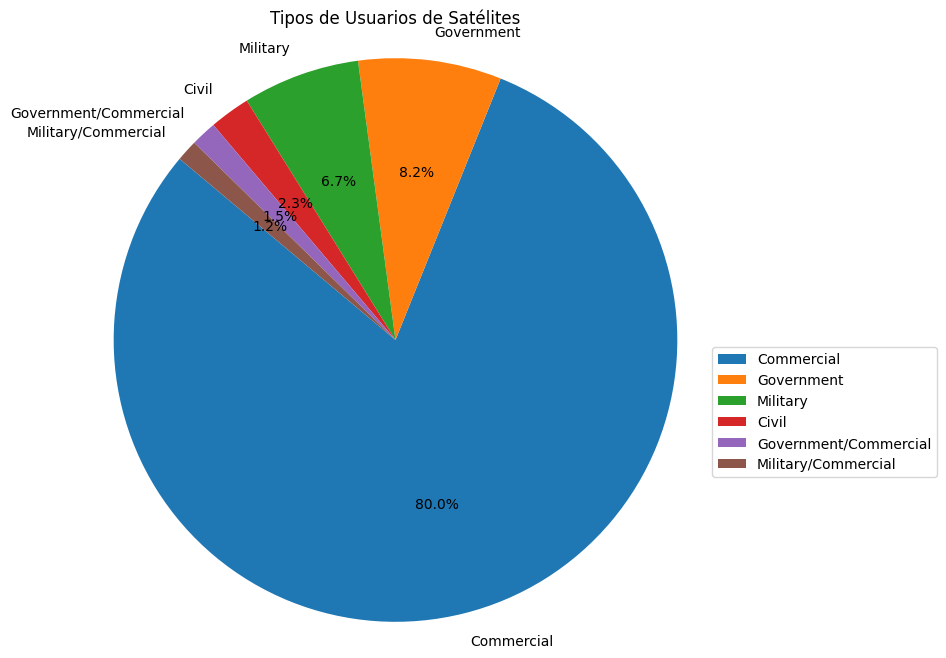

In [9]:

# Contar valores únicos en la columna 'Users'
conteo_usuarios = nuevo_df['Users'].value_counts()

# Filtrar para mostrar solo aquellos tipos de usuario que superen el 1%
conteo_usuarios = conteo_usuarios[conteo_usuarios / len(nuevo_df) * 100 > 1]

# Configurar los datos para el gráfico de pastel
labels = conteo_usuarios.index
sizes = conteo_usuarios.values

# Crear el gráfico de pastel con mejor presentación
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Tipos de Usuarios de Satélites')

# Mostrar porcentajes fuera del gráfico con una buena ubicación
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.show()

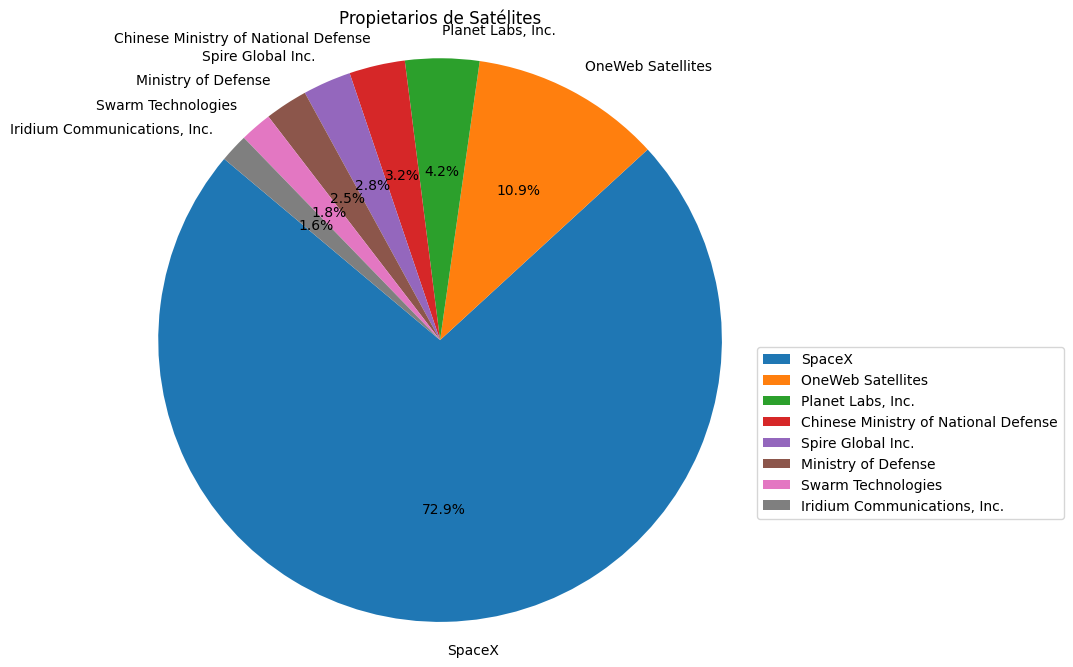

In [10]:

# Contar valores únicos en la columna 'Operator/Owner'
conteo_propietarios = nuevo_df['Operator/Owner'].value_counts()

# Filtrar para mostrar solo aquellos propietarios que superen el 1%
conteo_propietarios = conteo_propietarios[conteo_propietarios / len(nuevo_df) * 100 > 1]

# Configurar los datos para el gráfico de pastel
labels = conteo_propietarios.index
sizes = conteo_propietarios.values

# Crear el gráfico de pastel con mejor presentación
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Propietarios de Satélites')

# Mostrar porcentajes fuera del gráfico con una buena ubicación
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.show()

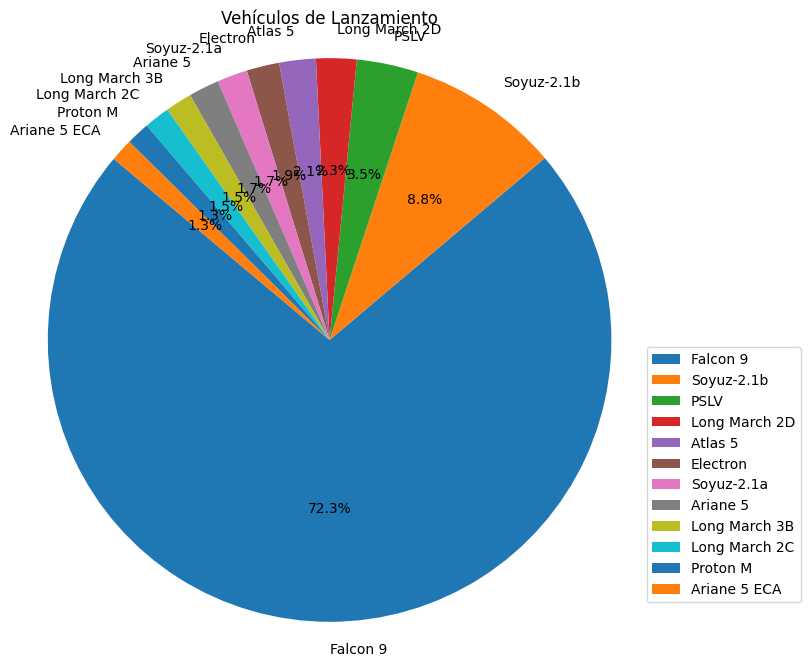

In [11]:

# Contar valores únicos en la columna 'Launch Vehicle'
conteo_vehiculos_lanzamiento = nuevo_df['Launch Vehicle'].value_counts()

# Filtrar para mostrar solo aquellos vehículos que superen el 1%
conteo_vehiculos_lanzamiento = conteo_vehiculos_lanzamiento[conteo_vehiculos_lanzamiento / len(nuevo_df) * 100 > 1]

# Configurar los datos para el gráfico de pastel
labels = conteo_vehiculos_lanzamiento.index
sizes = conteo_vehiculos_lanzamiento.values

# Crear el gráfico de pastel con mejor presentación
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Vehículos de Lanzamiento')

# Mostrar porcentajes fuera del gráfico con una buena ubicación
plt.legend(labels, loc="best", bbox_to_anchor=(1, 0.5))

plt.axis('equal')  # Hace que el gráfico sea un círculo en lugar de una elipse
plt.show()


In [ ]:
#  contar las filas por año
conteo_por_año = nuevo_df['Launch Year'].value_counts().reset_index()
conteo_por_año.columns = ['Año', 'Cantidad de Satélites Lanzados']

# Guardar los datos en un archivo CSV
conteo_por_año.to_csv('conteo_satelites_por_año.csv', index=False)

In [14]:
# Cargar los datos desde el archivo CSV
datos = pd.read_csv('conteo_satelites_por_año.csv')

# Ordenar los datos por año
datos = datos.sort_values('Año')

frames = []

# Crear frames para cada año
for i, year in enumerate(datos['Año']):
    current_data = datos.iloc[:i+1]

    frame = go.Frame(
        data=[
            go.Bar(
                x=current_data['Cantidad de Satélites Lanzados'],
                y=current_data['Año'],
                orientation='h',  # Orientación horizontal de las barras
                marker=dict(color='blue'),  # Color de las barras
            )
        ],
        name=str(year)
    )

    frames.append(frame)

# Crear la figura de Plotly
fig = go.Figure(
    data=[go.Bar(x=[], y=[], orientation='h')],  # Barra vacía para iniciar la figura con orientación horizontal
    layout=go.Layout(
        title='Cantidad de Satélites Lanzados por Año',
        yaxis=dict(range=[1995, 2023]),  # Establecer el rango del eje y
        xaxis=dict(range=[0, datos['Cantidad de Satélites Lanzados'].max() + 50]),  # Establecer el rango del eje x
    ),
    frames=frames,
)

# Actualizar el layout para que sea una animación
fig.update_layout(updatemenus=[{'type': 'buttons',
                                'buttons': [{'label': 'Play',
                                             'method': 'animate',
                                             'args': [None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]}]}])

# Mostrar la animación
fig.show()

In [13]:
#  contar las filas por año
conteo_por_año = nuevo_df['Launch Year'].value_counts().reset_index()
conteo_por_año.columns = ['Año', 'Cantidad de Satélites Lanzados']

# Guardar los datos en un archivo CSV
conteo_por_año.to_csv('conteo_satelites_por_año.csv', index=False)
